In [38]:
import numerapi
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#look at the /look_back_rounds/ most recent rounds and compute distance squared from your model for correlation vectors, find the lowest distance between your model and another in the top \leaderboard_count\ models excluding any \banned_models\
leaderboard_count = 25
look_back_rounds = 6  # number of rounds to consider in the past. 
my_model = "mrquantsalot"
banned_models = ["tutmodel"]
CURRENT_ROUND = numerapi.NumerAPI().get_current_round()

In [21]:
def get_user_latest_round_corr_scores(username:str)-> np.array:
    """
        Returns a list of round Corr scores for this user. 
        Scores at the top of the list are the most recent.
    """
    request_text  = "https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ username +"\"){latestRoundPerformances{correlation}}}"
    list_of_corr_dicts =  requests.get(request_text).json()['data']['v2UserProfile']['latestRoundPerformances']

    corr_scores = [round_dict["correlation"] for round_dict in list_of_corr_dicts]
    corr_scores.reverse()

    return np.array(corr_scores)

In [13]:
lowest_square_distance_name = numerapi.NumerAPI().get_leaderboard(1)[0]["username"] # get the username of the person on top of the leaderboard
lowest_square_distance_value = 1000000000000000000000000000
print(lowest_square_distance_name)
responseModel = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ model +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
for user in numerapi.NumerAPI().get_leaderboard(leaderboard_count):
    
    if(user["username"] in banned_models): # exclude other version of your own models.
        continue
    distance_square = 0
    response = requests.get("https://api-tournament.numer.ai/?query={v2UserProfile(username:\""+ user["username"] +"\"){latestRoundPerformances{correlation}}}").json()['data']['v2UserProfile']['latestRoundPerformances']
    #print(f'The response back was {response}\n\n')

    # response is a dictionary of all final  corrilation scores.
    for i in range(look_back_rounds): # you only want to look back at a fixed number of  rounds.
        other = response[-1 - i]["correlation"]
        if(other == None): 
            other = 1000
        distance_square += (other - responseModel[-1-i]["correlation"])**2
    if distance_square < lowest_square_distance_value:
        lowest_square_distance_value = distance_square
        lowest_square_distance_name = user["username"]



benben11


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [4]:
print(lowest_square_distance_name,lowest_square_distance_value)


NameError: name 'lowest_square_distance_name' is not defined

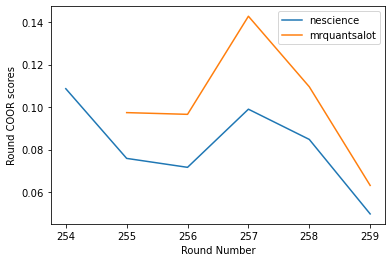

In [48]:
lowest_square_distance_name = 'nescience'

def create_your_other_user_scores_df(other_user, you_username):
    most_similar_user_scores = get_user_latest_round_corr_scores(other_user)
    my_scores =  get_user_latest_round_corr_scores(username=you_username)

    rounds_in_consideration = [num_round for num_round in range(CURRENT_ROUND-1, (CURRENT_ROUND-1 - look_back_rounds), -1)]
    rounds_in_consideration = np.array(rounds_in_consideration)

    df = pd.DataFrame(  {
                       'round_number' :rounds_in_consideration,
                       'similar_user_scores': most_similar_user_scores[:look_back_rounds],
                       'your_scores' : my_scores[:look_back_rounds]
                        })
    
    return df, rounds_in_consideration



def create_line_plot_of_scores(df, round_in_consideration):
    plt.plot(rounds_in_consideration,df['similar_user_scores'], label=lowest_square_distance_name)
    plt.plot(rounds_in_consideration,df['your_scores'], label=my_model)
    plt.ylabel('Round COOR scores')
    plt.xlabel('Round Number')
    plt.legend()
    plt.show()

df, rounds_in_consideration = create_your_other_user_scores_df(lowest_square_distance_name,my_model)
create_line_plot_of_scores(df,rounds_in_consideration)

### For me, swagbot is the most similar. 
